The formulae below are taken from Chapter 3 of Snow and Climate, by Armstrong and Brun. They are used to calculate the probability of blowing snow in the Canadian Praries as a function of temperature in degrees Celcius and snow surface age in hours.

\begin{gather*}
P(u_{10}, T_a, t_h) = \frac{1}{\sqrt{2\pi\delta}}\int_{0}^{u_{10}} \exp\left(-\frac{(\bar{u}-u)^2}{2\delta^2}\right)du \\
\bar{u} = 11.2 + 0.365T_a + 0.00706T_a^2 + 0.9\ln{t_h} \\
\delta = 4.3 + 0.145T_a + 0.00196T_a^2
\end{gather*}

In [1]:
from numpy import exp, sqrt, pi, zeros
from math import log

def u_bar(T_a, t_h):    # mean wind speed
    return 11.2 + 0.365*T_a + 0.00706*T_a**2 + 0.9*log(t_h)

def delta(T_a):    # standard deviation of wind speed
    return 4.3 + 0.145*T_a + 0.00196*T_a**2  

def integrand(u, T_a, t_h):   # integrand for probability of blowing snow
    TaP = zeros((len(T_a), len(u)))
    for i in range(len(T_a)):
        TaP[i, :] = exp(-(u_bar(T_a[i], t_h) - u)**2/(2*delta(T_a[i])**2))/(sqrt(2*pi*delta(T_a[i])))
    return TaP

In [2]:
from numpy import dot
from gaussxw import gaussxwab

def P(u_10, T_a, t_h):
    N = 100
    u, w = gaussxwab(N, 0., u_10)
    f = integrand(u, T_a, t_h)
    return dot(f, w)

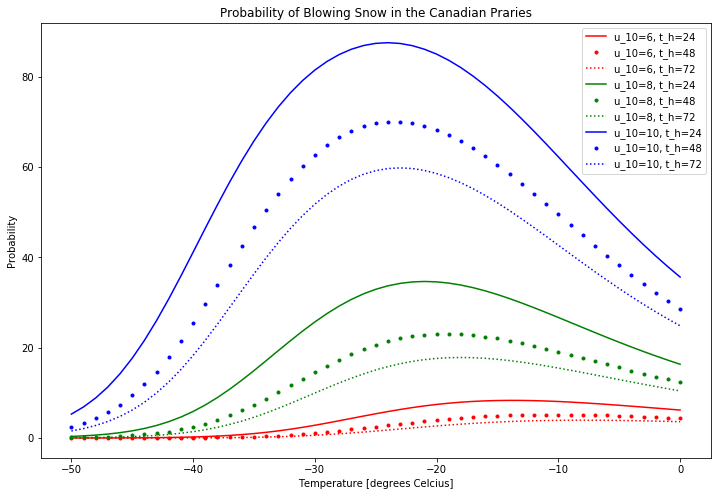

In [3]:
from pylab import figure, plot, xlabel, ylabel, title, legend, show
from numpy import arange

T_a = arange(-50, 1, 1)    # temperatures for which it may snow

figure(1, figsize=[12,8])
leg = []
for (u_10, color) in zip((6, 8, 10), ('r', 'g', 'b')):
    for (t_h, line) in zip((24, 48, 72), ('-', '.', ':')):
        plot(T_a, P(u_10, T_a, t_h)*100,line+color)
        leg.append('u_10={}, t_h={}'.format(u_10, t_h))
xlabel('Temperature [degrees Celcius]'), ylabel('Probability')
title('Probability of Blowing Snow in the Canadian Praries')
legend(leg)
show()